# Churn Model - Artificial Neural Network

Churn models, or customer churn models, are used in business to predict which customers are most likely to abandon or terminate their business relationship with a company in the near future. These models are especially useful for companies that operate in industries where customer retention is crucial, such as telecommunications, subscription services, banking, and insurance.



## Data Ingestion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/drive/MyDrive/deeplearning/Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
# RowNumber, CustomerId, Surname are not neccesary.

X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [ ]:
!pip install tensorflow
!pip install Theano
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=b2329d54cd47b03af623b16e811f3291c793fa39648c4c35c573a98fa34b0cd0
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Successfully built Theano
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])     #Country - 3 possible values
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])     #Gender - 2 possible values

In [ ]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ("Churn_Modelling",        # Un nombre de la transformación
         OneHotEncoder(categories='auto'), # La clase a la que transformar
         [1]            # Las columnas a transformar.
         )
    ], remainder='passthrough'
)

X = transformer.fit_transform(X)
X = X[:, 1:]      #elimino columna Francia, para evitar multicolinealidad. Si ESP=0 AND GER=0 THEN FRA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


## AI Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

### Artificial Neural Network


In [ ]:
# Inicializar la RNA
classifier = Sequential()

# First Layer
# Input 11 nodes - Outputs 6
classifier.add(Dense(units = 6, kernel_initializer = "uniform",
                     activation = "relu", input_dim = 11))

#activation  = ReLU ->
#input_dim = x.shape
classifier.add(Dropout(rate = 0.1))   # Generalmente se aplican luego de una capa dense

# Añadir la segunda capa oculta
# units = 6 > experimentación > media entre units_entrada (11) y units_salida (1)
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
classifier.add(Dropout(rate = 0.1))

# Añadir la capa de salida
# Activación -> Sigmoid: requiero output [0,1] probabilidad de que se quede o no
# units = 1 > output se queda o no
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

# Compilar la RNA
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_train, y_train,  batch_size = 25, epochs = 70)

Epoch 1/70
320/320 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0.7939
Epoch 2/70
320/320 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.7960
Epoch 3/70
320/320 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.7960
Epoch 4/70
320/320 [==============================] - 1s 2ms/step - loss: 0.4345 - accuracy: 0.7960
Epoch 5/70
320/320 [==============================] - 1s 3ms/step - loss: 0.4330 - accuracy: 0.7960
Epoch 6/70
320/320 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.7960
Epoch 7/70
320/320 [==============================] - 1s 3ms/step - loss: 0.4267 - accuracy: 0.7960
Epoch 8/70
320/320 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.7960
Epoch 9/70
320/320 [==============================] - 1s 4ms/step - loss: 0.4296 - accuracy: 0.7960
Epoch 10/70
320/320 [==============================] - 2s 5ms/step - loss: 0.4260 - accuracy: 0.8020

La función ReLU es lineal para valores positivos y cero para valores negativos. A diferencia de la función sigmoid o tanh, que pueden sufrir saturación en ciertos rangos de entrada, la función ReLU no presenta este problema. La saturación ocurre cuando los valores de entrada son muy grandes o muy pequeños, lo que puede ralentizar o dificultar el proceso de aprendizaje de la red neuronal. La función ReLU evita este problema y permite un cálculo más eficiente.

ReLU:

* Problemas de clasificación binaria o multiclase.
* Redes neuronales convolucionales (CNN) para tareas de visión por computadora.
* Cuando se trabaja con conjuntos de datos grandes, ya que ReLU es computacionalmente eficiente.
* Aplicación Detección de objetos en imágenes utilizando redes neuronales convolucionales (CNN), predicción de precios de acciones en mercados financieros, detección de fraudes en transacciones bancarias.


Tanh (Tangente hiperbólica):

* Problemas de clasificación binaria o multiclase.
* Redes neuronales recurrentes (RNN) para tareas de procesamiento de lenguaje natural.
* Problemas donde los datos están normalizados en un rango específico (como -1 a 1).
* Aplicaciones: Reconocimiento de escritura a mano en sistemas de reconocimiento de caracteres, Análisis de sentimientos en comentarios de redes sociales, Detección de objetos en videos utilizando redes neuronales recurrentes (RNN).

Step (Función Escalón):

* Problemas de clasificación binaria simples.
* Problemas donde solo se requiere una salida binaria (0 o 1).
* Problemas con características bien definidas y límites claros.
* Aplicaciones: Detección de spam en sistemas de filtrado de correos electrónicos, Clasificación de imágenes en aplicaciones de reconocimiento facial, Detección de anomalías en sensores en sistemas de monitoreo industrial.

Sigmoid (Función Sigmoide):

* Problemas de clasificación binaria.
* Problemas donde se requiere una salida en el rango de 0 a 1 (como probabilidades).
* Problemas donde se desea una respuesta suave y diferenciable.
* Aplicaciones: Clasificación de imágenes médicas en aplicaciones de diagnóstico por imágenes, predicción de la intención de compra en sistemas de recomendación en línea.

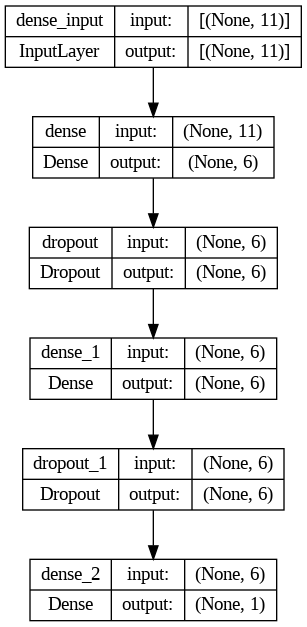

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(classifier, to_file='modelo.png', show_shapes=True, show_layer_names=True)

Las capas de Dropout se utilizan para reducir el sobreajuste en redes neuronales. Al descartar aleatoriamente algunas unidades durante el entrenamiento, evitan la dependencia excesiva entre neuronas y promueven una representación más robusta. Esto mejora la generalización y evita problemas como el desvanecimiento del gradiente.

El algoritmo Adam calcula y almacena dinámicamente tasas de aprendizaje individuales para cada parámetro en la red neuronal. Esto se logra mediante el cálculo de estimaciones adaptativas de primer y segundo momento de los gradientes.

Las principales ventajas de Adam incluyen:

* Eficiencia: Adam es conocido por ser un optimizador eficiente debido a su capacidad para adaptar la tasa de aprendizaje de forma individual para cada parámetro. Esto permite que la red neuronal se adapte rápidamente a diferentes características y requisitos de aprendizaje en diferentes partes del espacio de parámetros.

* Adaptabilidad: Adam ajusta automáticamente la tasa de aprendizaje durante el entrenamiento. Si los gradientes son grandes, la tasa de aprendizaje se reduce para garantizar una convergencia estable y evitar oscilaciones. Por otro lado, si los gradientes son pequeños, la tasa de aprendizaje se incrementa para acelerar el aprendizaje.

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Prediction

In [ ]:
y_pred  = classifier.predict(X_test)
y_pred = (y_pred>0.5)


63/63 [==============================] - 0s 694us/step


In [ ]:
len(y_pred)

2000

In [ ]:
df_y_pred = pd.DataFrame(y_pred)


In [ ]:
X_test.shape

(2000, 11)

* FALSE = NO VA A DEJAR EL BANCO
* TRUE = VA A DEJAR EL BANCO


In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
y_pred = y_pred.reshape((-1, 1))


In [ ]:
data_with_pred = np.concatenate((X_test, y_pred), axis=1)


In [ ]:
df = pd.DataFrame(data_with_pred)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.754865,-0.573694,-0.552043,-1.091687,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,0.0
1,-0.569844,-0.573694,-1.314903,-1.091687,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,0.0
2,-0.569844,1.743090,0.571630,-1.091687,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,0.0
3,-0.569844,-0.573694,1.416961,0.916013,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,0.0
4,1.754865,-0.573694,0.571630,0.916013,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,0.0


## Model Evaluation

### Confussion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1558   37]
 [ 283  122]]


In [ ]:
#accuracy
(cm[0][0]+cm[1][1])/cm.sum()

0.84

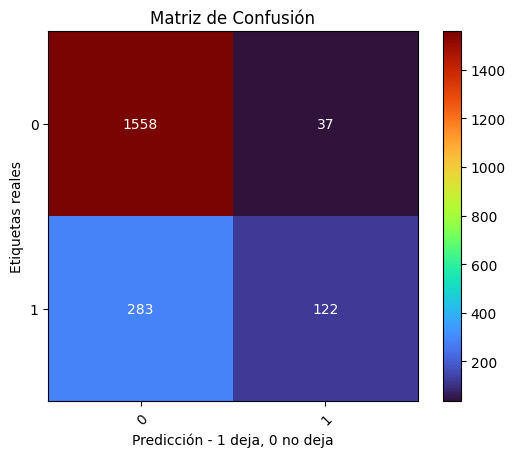

In [ ]:

# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar la matriz de confusión como un mapa de calor
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.turbo)

# Agregar una barra de color
plt.colorbar(im)

# Etiquetas de los ejes
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xlabel='Predicción - 1 deja, 0 no deja',
       ylabel='Etiquetas reales')

# Rotar y alinear los valores de los ejes
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Ciclo para mostrar los valores dentro de las celdas
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="white")

ax.set_title("Matriz de Confusión")

plt.show()

Para evaluar el desempeño del modelo en la detección de los casos de churn (abandono), se debería utilizar la métrica de Recall (también conocida como Sensibilidad o True Positive Rate).

El Recall se define como la proporción de casos positivos reales que fueron correctamente identificados como positivos por el modelo.

In [ ]:
TP = cm[1, 1]
FN = cm[1, 0]

Recall = TP / (TP + FN)
print(Recall)

0.3012345679012346


Se tiene un buen accuracy pero un mal recall en el problema de churn, significa que el modelo está obteniendo un alto porcentaje de predicciones correctas en general, pero está fallando en identificar correctamente los casos de churn (recall).

Esto puede indicar que el modelo está siendo demasiado conservador al predecir los casos de churn, es decir, está clasificando a menos clientes como propensos a abandonar de lo que debería. En consecuencia, se obtiene un alto número de falsos negativos (casos positivos reales clasificados incorrectamente como negativos), lo que indica que estás dejando pasar oportunidades para identificar y retener a los clientes en riesgo de churn.

Un buen accuracy por sí solo no es suficiente para evaluar adecuadamente el desempeño del modelo en un problema de churn, ya que puede ser engañoso si la clase mayoritaria (clientes no churn) domina el conjunto de datos.

#### Test - Sampling

In [ ]:
test = np.array([[0,0,600, 1, 40, 3, 60000, 2, 1, 1, 50000]])

In [ ]:
test_scaled = scaler.transform(test)

In [ ]:
test_prediction = classifier.predict(test_scaled)

1/1 [==============================] - 0s 72ms/step


In [ ]:
print(test_prediction)
print(test_prediction>0.4)


[[0.0854729]]
[[False]]


## Hyperparameter Tuning

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu", input_dim = 11))
  classifier.add(Dense(units = 6, kernel_initializer = "uniform", activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))
  classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 60)
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, verbose = 1)

<ipython-input-46-2f61aa8f1cad>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 60)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.7s finished


cv: Este argumento representa el número de pliegues o divisiones que se utilizarán en la validación cruzada. En este caso, se utilizan 10 pliegues, lo que significa que se realizará una validación cruzada con 10 iteraciones diferentes.

n_jobs: Este argumento especifica el número de trabajos en paralelo que se ejecutarán para completar el cálculo. Un valor de -1 indica que se utilizarán todos los procesadores disponibles.

verbose: Este argumento controla el nivel de detalle o verbosidad de la salida durante el proceso de validación cruzada. Un valor de 1 indica que se mostrará información detallada durante el proceso.

In [ ]:
mean = accuracies.mean()
variance = accuracies.std()
print("mean: ", mean)
print("variance: ", variance)

mean:  0.7970000088214875
variance:  0.00995615381002768


In [ ]:
accuracies

array([0.78625   , 0.80000001, 0.80000001, 0.78250003, 0.81625003,
       0.81      , 0.78750002, 0.79374999, 0.79874998, 0.79500002])

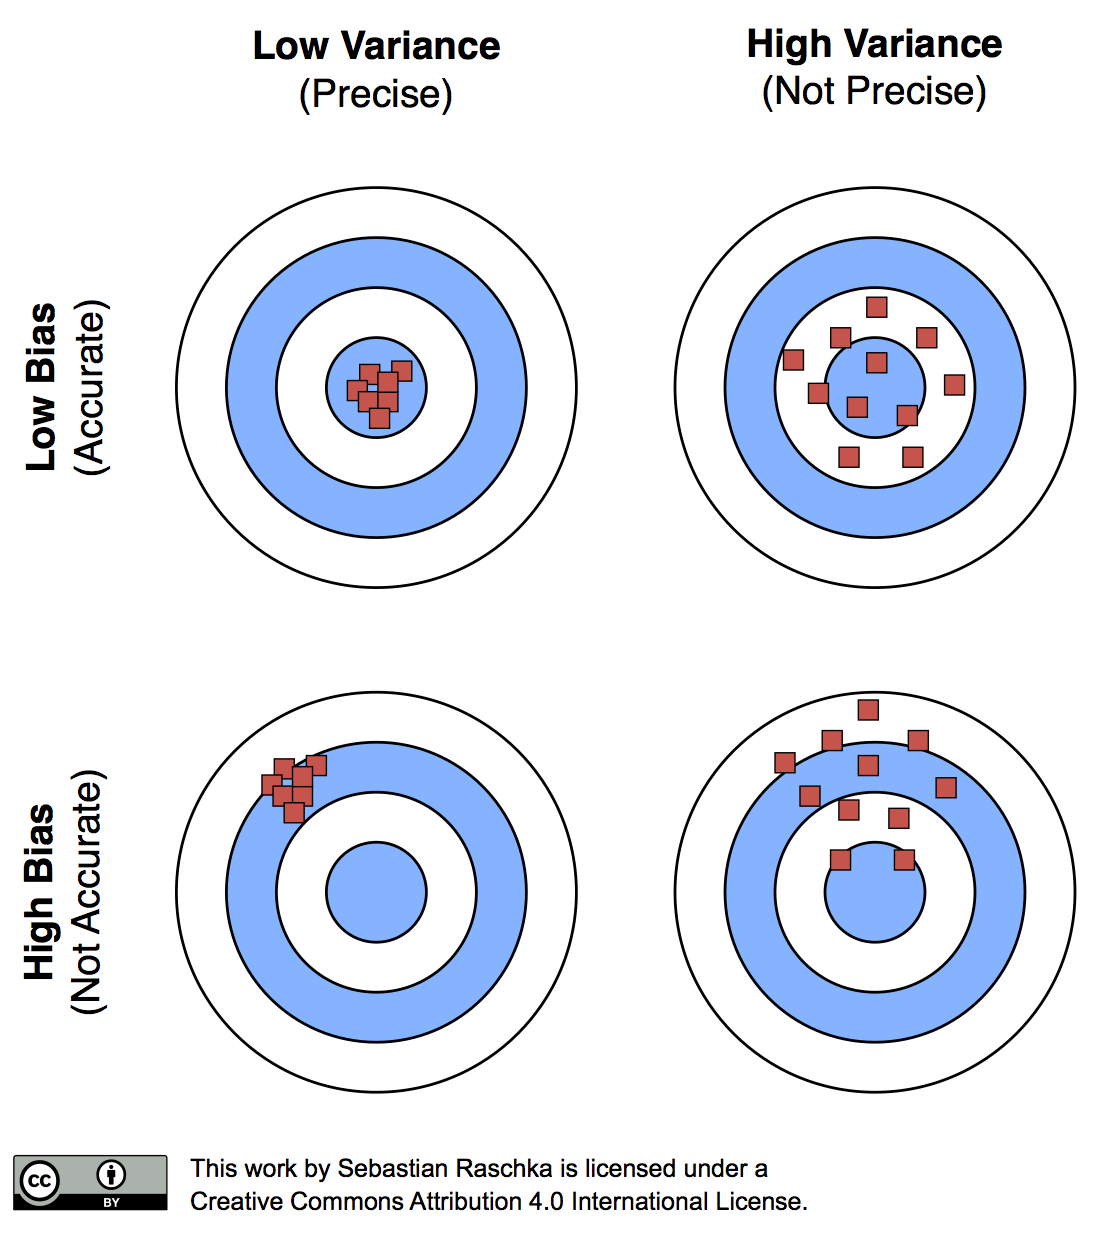

### Mejora del modelo

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
def build_classifier(optimizer):
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu", input_dim = 11))
  classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))
  classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
  classifier.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])
  return classifier

In [ ]:
classifier = KerasClassifier(build_fn = build_classifier)


<ipython-input-52-0ea0e60dd759>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


In [ ]:
parameters = {
    'batch_size' : [15, 25,32],
    'nb_epoch' : [50, 100, 250, 400],
    'optimizer' : ['adam', 'rmsprop']
}

In [ ]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

534/534 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7949


In [ ]:
print(best_parameters)

{'batch_size': 15, 'nb_epoch': 50, 'optimizer': 'adam'}


In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 15, nb_epoch = 50)
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1, verbose = 1)

<ipython-input-61-49374a464788>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, batch_size = 15, nb_epoch = 50)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   12.2s finished


In [ ]:
mean = accuracies.mean()
variance = accuracies.std()
print("mean: ", mean)
print("variance: ", variance)

mean:  0.7960000097751617
variance:  0.010105690527913859
